# Random Forest Implementation

The random forest algorithm is a supervised classification algorithm.

The fundamental idea behind a random forest is to combine many decision trees into a single model. Individually, predictions made by decision trees (or humans) may not be accurate, but combined together, the predictions will be closer to the mark on average.

The same algorithm can be used for the classification and regression.

# Data Set

The data set which we would be using has been downloaded from Kaggle
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# Code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set()
warnings.simplefilter('ignore')

fraud_df = pd.read_csv("creditcard.csv")
df = fraud_df.copy() # To keep the data as backup
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print("fDataset Shape :- \n ",fraud_df.shape)


fDataset Shape :- 
  (284807, 31)


In [4]:
print(f"Columns or Feature names :- \n",fraud_df.columns)

Columns or Feature names :- 
 Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [5]:
print(f"Unique values of target variable :- \n ",fraud_df['Class'].unique())

Unique values of target variable :- 
  [0 1]


In [6]:
print(f"Number of samples under each target value :- \n", fraud_df['Class'].value_counts())

Number of samples under each target value :- 
 0    284315
1       492
Name: Class, dtype: int64


In [7]:
# make sure which features are useful & which are not
# we can remove irrelevant features
fraud_df = fraud_df.drop(['Time'], axis=1)
print(f"list of feature names after removing Time column :- \n",fraud_df.columns)

list of feature names after removing Time column :- 
 Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')


In [8]:
print(f"Dataset info :- \n", fraud_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
print(f"few values of Amount column :- \n ",fraud_df['Amount'][0:4])

few values of Amount column :- 
  0    149.62
1      2.69
2    378.66
3    123.50
Name: Amount, dtype: float64


In [11]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

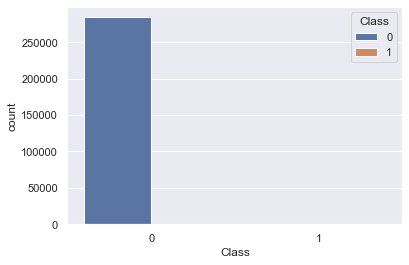

In [12]:
sns.countplot(x=df.Class, hue=df.Class)

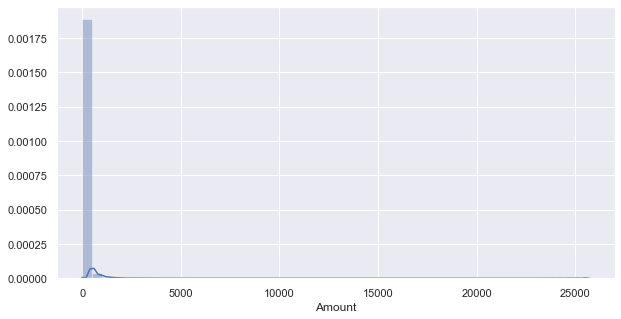

In [13]:
plt.figure(figsize=(10, 5))
sns.distplot(df.Amount)

In [14]:
df['Amount-Bins'] = ''

In [15]:
def make_bins(predictor, size=50):
    '''
    Takes the predictor (a series or a dataframe of single predictor) and size of bins
    Returns bins and bin labels
    '''
    bins = np.linspace(predictor.min(), predictor.max(), num=size)

    bin_labels = []

    # Index of the final element in bins list
    bins_last_index = bins.shape[0] - 1

    for id, val in enumerate(bins):
        if id == bins_last_index:
            continue
        val_to_put = str(int(bins[id])) + ' to ' + str(int(bins[id + 1]))
        bin_labels.append(val_to_put)
    
    return bins, bin_labels

In [16]:
bins, bin_labels = make_bins(df.Amount, size=10)

In [17]:
df['Amount-Bins'] = pd.cut(df.Amount, bins=bins,
                           labels=bin_labels, include_lowest=True)
df['Amount-Bins'].head().to_frame()

,Amount-Bins
0,0 to 2854
1,0 to 2854
2,0 to 2854
3,0 to 2854
4,0 to 2854


In [18]:
df['Amount-Bins'].value_counts()

0 to 2854         284484
2854 to 5709         285
5709 to 8563          28
8563 to 11418          4
11418 to 14272         3
17127 to 19982         2
22836 to 25691         1
19982 to 22836         0
14272 to 17127         0
Name: Amount-Bins, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

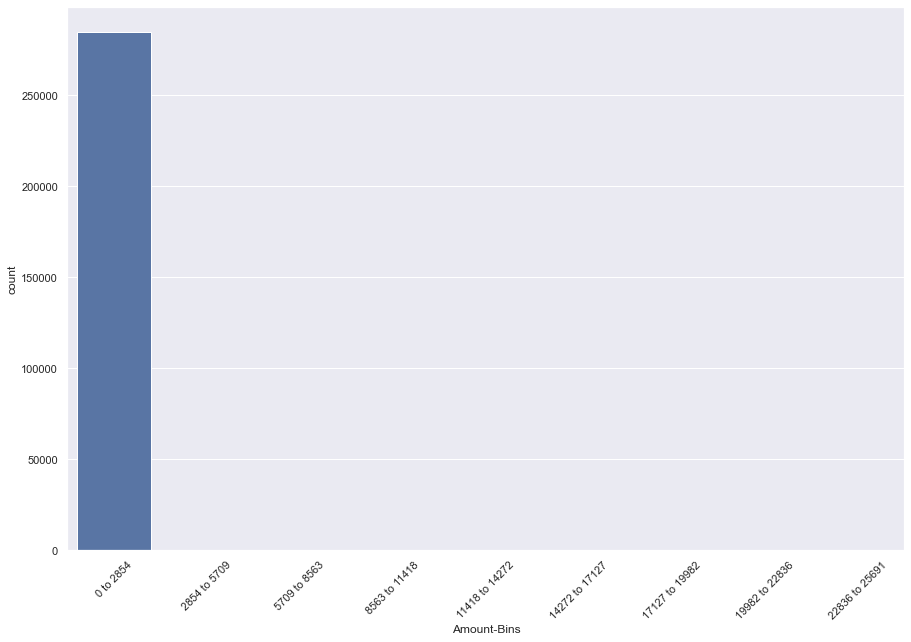

In [19]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Amount-Bins', data=df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

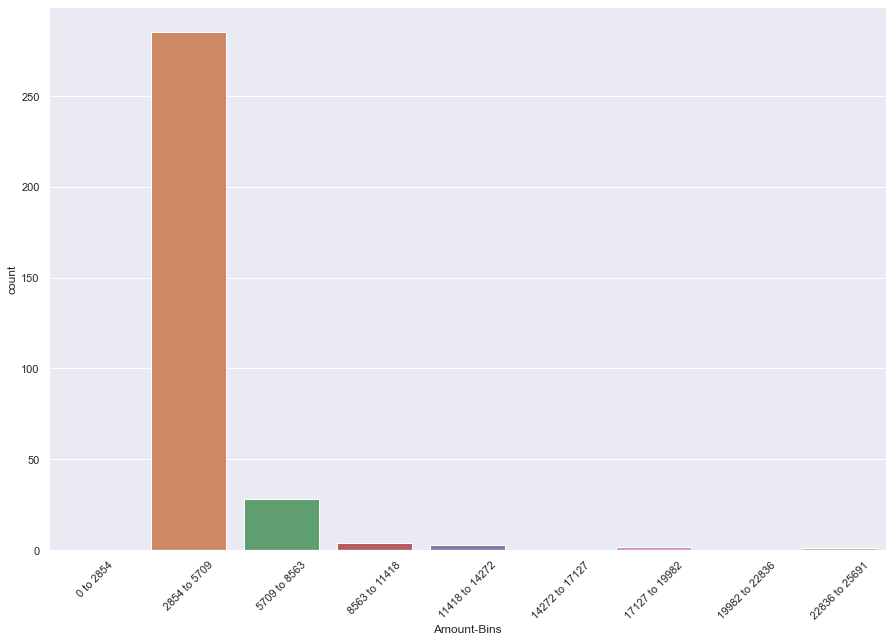

In [20]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Amount-Bins', data=df[~(df['Amount-Bins'] == '0 to 2854')])
plt.xticks(rotation=45)

In [10]:
# data preprocessing
from sklearn.preprocessing import StandardScaler
fraud_df['norm_amount'] = StandardScaler().fit_transform(
fraud_df['Amount'].values.reshape(-1,1))
fraud_df = fraud_df.drop(['Amount'], axis=1)
print(f"few values of Amount column after applying StandardScaler:- \n", fraud_df['norm_amount'][0:4])

few values of Amount column after applying StandardScaler:- 
 0    0.244964
1   -0.342475
2    1.160686
3    0.140534
Name: norm_amount, dtype: float64


In [11]:
## Features and target creations
X = fraud_df.drop(['Class'], axis=1)
y = fraud_df[['Class']]

In [12]:
# splitting dataset to train & test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(199364, 29)
(85443, 29)
(199364, 1)
(85443, 1)


In [13]:
## Model with randomforest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def random_forest_classifier(X_train, y_train, X_test, y_test):
     # initialize object for DecisionTreeClassifier class
     rf_classifier = RandomForestClassifier(n_estimators=50)
     # train model by using fit method
     print("Model training starts........")
     rf_classifier.fit(X_train, y_train.values.ravel())
     acc_score = rf_classifier.score(X_test, y_test)
     print(f'Accuracy of model on test dataset :- {acc_score}')
     # predict result using test dataset
     y_pred = rf_classifier.predict(X_test)
     # confusion matrix
     print(f"Confusion Matrix :- \n {confusion_matrix(y_test, y_pred)}")
     # classification report for f1-score
     print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")


# calling random_forest_classifier
random_forest_classifier(X_train, y_train, X_test, y_test)

Model training starts........
Accuracy of model on test dataset :- 0.9995084442259752
Confusion Matrix :- 
 [[85290     6]
 [   36   111]]
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.76      0.84       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [14]:
print(f"Number of samples under each target value :- \n {fraud_df['Class'].value_counts()}")


Number of samples under each target value :- 
 0    284315
1       492
Name: Class, dtype: int64


In [15]:
class_val = fraud_df['Class'].value_counts()
print(f"Number of samples for each class :- \n {class_val}")
non_fraud = class_val[0]
fraud = class_val[1]
print(f"Non Fraudulent Numbers :- {non_fraud}")
print(f"Fraudulent Numbers :- {fraud}")

Number of samples for each class :- 
 0    284315
1       492
Name: Class, dtype: int64
Non Fraudulent Numbers :- 284315
Fraudulent Numbers :- 492


In [16]:
## Equal both the target samples to the same level
# take indexes of non fraudulent
nonfraud_indexies = fraud_df[fraud_df.Class == 0].index
fraud_indices = np.array(fraud_df[fraud_df['Class'] == 1].index)
# take random samples from non fraudulent that are equal to fraudulent samples
random_normal_indexies = np.random.choice(nonfraud_indexies, fraud, replace=False)
random_normal_indexies = np.array(random_normal_indexies)

In [17]:
## Equal both the target samples to the same level
# take indexes of non fraudulent
nonfraud_indexies = fraud_df[fraud_df.Class == 0].index
fraud_indices = np.array(fraud_df[fraud_df['Class'] == 1].index)
# take random samples from non fraudulent that are equal to fraudulent samples
random_normal_indexies = np.random.choice(nonfraud_indexies, fraud, replace=False)
random_normal_indexies = np.array(random_normal_indexies)


## Undersampling techniques

# concatenate both indices of fraud and non fraud
under_sample_indices = np.concatenate([fraud_indices, random_normal_indexies])

#extract all features from whole data for under sample indices only
under_sample_data = fraud_df.iloc[under_sample_indices, :]

# now we have to divide under sampling data to all features & target
x_undersample_data = under_sample_data.drop(['Class'], axis=1)
y_undersample_data = under_sample_data[['Class']]
# now split dataset to train and test datasets as before
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
x_undersample_data, y_undersample_data, test_size=0.2, random_state=0)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

def random_forest_classifier(X_train, y_train, X_test, y_test):
 # initialize object for DecisionTreeClassifier class
 rf_classifier = RandomForestClassifier(n_estimators=50)
 # train model by using fit method
 print("Model training start........")
 rf_classifier.fit(X_train, y_train.values.ravel())
 acc_score = rf_classifier.score(X_test, y_test)
 print(f'Accuracy of model on test dataset :- {acc_score}')
 # predict result using test dataset
 y_pred = rf_classifier.predict(X_test)
 # confusion matrix
 print(f"Confusion Matrix :- \n {confusion_matrix(y_test, y_pred)}")
 # classification report for f1-score
 print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")
 # area under roc curve
 print(f"AROC score :- \n {roc_auc_score(y_test, y_pred)}")

random_forest_classifier(X_train_sample, y_train_sample, X_test_sample, y_test_sample)

Model training start........
Accuracy of model on test dataset :- 0.949238578680203
Confusion Matrix :- 
 [[101   5]
 [  5  86]]
Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.95      0.95      0.95        91

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197

AROC score :- 
 0.9489425668670952
